In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np


# 1.studying the dataset 
### 1.1) Importing the dataset 

In [3]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


### 1.2) Finding the null values 

In [4]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

### 1.3) Replacing all the null values with 0 

In [5]:
df = df.fillna(0)

In [6]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# 2) Data preprocessing 
### 2.1) removing unwanted column 

In [7]:
del df['vaccines']
del df['source_name']
del df['source_website']
del df['total_vaccinations_per_hundred']
del df['people_vaccinated_per_hundred']
del df['people_fully_vaccinated_per_hundred']
del df['daily_vaccinations_per_million']
del df['daily_vaccinations_raw']
del df['daily_vaccinations']
del df['people_fully_vaccinated']
del df['iso_code']
df.head()


,country,date,total_vaccinations,people_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0


### 2.2) preprocessing the date column 

In [8]:
month_ = {1:'Jan', 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun',
        7:'Jul', 8:'Aug' , 9:'Sept' , 10:'Oct' , 11:'Nov' , 12:'Dec'}

year = []
month = []
day = []

for i in df['date']:
    year.append(int(i.split('-')[0]))
    month.append(int(i.split('-')[1]))
    day.append(int(i.split('-')[2]))

df['day'] = day
df['month'] = month
df['year'] = year


In [9]:
months =[]
for i in df['month']:
    months.append(month_[i])
df['month'] = months

df.head()

,country,date,total_vaccinations,people_vaccinated,day,month,year
0,Afghanistan,2021-02-22,0.0,0.0,22,Feb,2021
1,Afghanistan,2021-02-23,0.0,0.0,23,Feb,2021
2,Afghanistan,2021-02-24,0.0,0.0,24,Feb,2021
3,Afghanistan,2021-02-25,0.0,0.0,25,Feb,2021
4,Afghanistan,2021-02-26,0.0,0.0,26,Feb,2021


### 2.3) preprocessing total_vaccinations column

In [10]:
total_vaccinations =[]

for i in df['total_vaccinations']:
    total_vaccinations.append(int(i))
    
df['total_vaccinations'] = total_vaccinations

### 2.4) preprocessing people_vaccinations column 

In [11]:
people_vaccinated = []

for i in df['people_vaccinated']:
    people_vaccinated.append(int(i))
    
df['people_vaccinated'] = people_vaccinated

df.head()

,country,date,total_vaccinations,people_vaccinated,day,month,year
0,Afghanistan,2021-02-22,0,0,22,Feb,2021
1,Afghanistan,2021-02-23,0,0,23,Feb,2021
2,Afghanistan,2021-02-24,0,0,24,Feb,2021
3,Afghanistan,2021-02-25,0,0,25,Feb,2021
4,Afghanistan,2021-02-26,0,0,26,Feb,2021


# Q1.) Find the number of Total Vaccinations in India in Year 2020,2021 and 2022

In [12]:
# number of people vaccinated in india in the year 2020
c1 = 0

for i in df.values:
    if (i[0]=='India'and i[6] =='2020'):
        c1 += int(i[3])
        
print('Total number of people vaccinated in the year 2020: ',c1)


# number of people vaccinated in india in the year 2021
c2 = 0
    
for i in df.values:
    if (i[0]=='India'and i[6] == 2021):
        c2 += int(i[3])
        
print('Total number of people vaccinated in the year 2021: ',c2)


# number of people vaccinated in india in the year 2022
c3 = 0
    
for i in df.values:
    if (i[0]=='India'and i[6] == 2022):
        c3 += int(i[3])
        
print('Total number of people vaccinated in the year 2022: ',c3)


Total number of people vaccinated in the year 2020:  0
Total number of people vaccinated in the year 2021:  122780611620
Total number of people vaccinated in the year 2022:  83039126718


### Visualising Covid data with the help of pie chart 

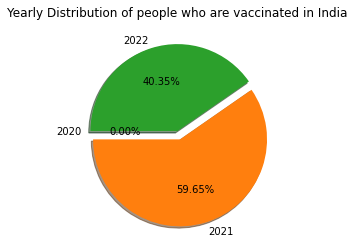

In [163]:
year_wise_distribution = [c1 , c2 ,c3]
explodes =[0,0.1,0]
labels= ['2020','2021','2022']
plt.pie(year_wise_distribution,labels= labels,startangle = 180,explode =explodes,shadow = True,autopct = '%1.2f%%')

plt.title('Yearly Distribution of people who are vaccinated in India')
plt.show()

### Visualising using Bar plot

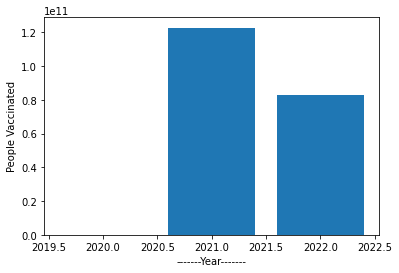

In [164]:
x = [2020,2021,2022]
y = [c1,c2,c3]

plt.bar(x,y)
plt.xlabel('-------Year-------')
plt.ylabel('People Vaccinated')
plt.show()

### Visualising using line plot

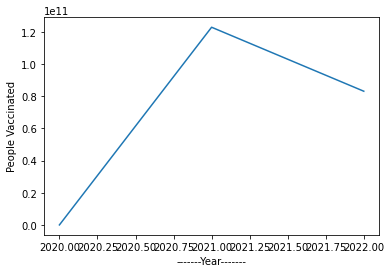

In [165]:
x = [2020,2021,2022]
y = [c1,c2,c3]

plt.plot(x,y)
plt.xlabel('-------Year-------')
plt.ylabel('People Vaccinated')
plt.show()


### visualising using scatterplot

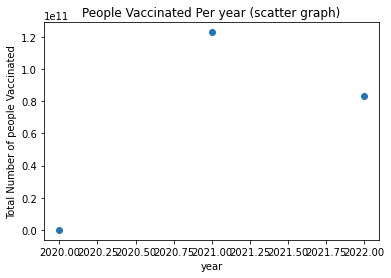

In [166]:
plt.scatter(x,y)
plt.title('People Vaccinated Per year (scatter graph)')
plt.xlabel('year')
plt.ylabel('Total Number of people Vaccinated')
plt.show()

# Q2.) Compare number of total vaccinations in year 2021 of India and USA

In [14]:
count1 = 0
for i in df.values:
    if i[0]=='India' and i[6] == 2021:
        count1 += i[3]
print('total vaccinations in year 2020 of India :',count1)

count2 = 0
for i in df.values:
    if i[0] == 'United States' and i[6] == 2021:
        count2 += i[3]
print('total vaccinations in year 2020 of United States (US) :',count2)

x_axis = [count1,count2]
y_axis = ['India','United States']

total vaccinations in year 2020 of India : 122780611620
total vaccinations in year 2020 of United States (US) : 58077557268


### visualising bar chart

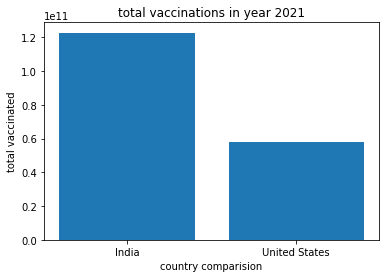

In [15]:
plt.bar(y_axis,x_axis)
plt.title('total vaccinations in year 2021')
plt.xlabel('country comparision')
plt.ylabel('total vaccinated')
plt.show()

### visualising using pie chart 

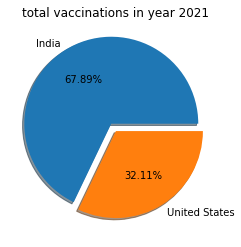

In [17]:
plt.pie(x_axis,labels = y_axis,explode =[0.1,0],shadow = True,autopct ='%1.2f%%')
plt.title('total vaccinations in year 2021')
plt.show()

### visualising using line graph

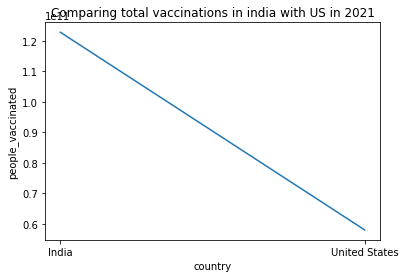

In [20]:
plt.plot(y_axis,x_axis)
plt.title('Comparing total vaccinations in india with US in 2021')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

### visualising using scatterplot

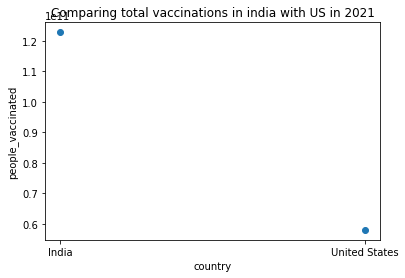

In [21]:
plt.scatter(y_axis,x_axis)
plt.title('Comparing total vaccinations in india with US in 2021')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

# Q3.) Compare number of total vaccinations in year 2021 of India and China

In [168]:
tot1 = 0
for i in df.values:
    if i[0]=='India' and i[6] == 2021:
        tot1 += i[3]
print('Total vaccination in India in the year 2021 : ',tot1)


tot2 = 0
for i in df.values:
    if i[0] == 'China' and i[6] == 2021:
        tot2 += i[3]
print('Total vaccination in China in the year 2021 : ',tot2)


x = [tot1,tot2]
y = ['India', 'China']

Total vaccination in India in the year 2021 :  122780611620
Total vaccination in China in the year 2021 :  6375309000


### visualising using pie chart

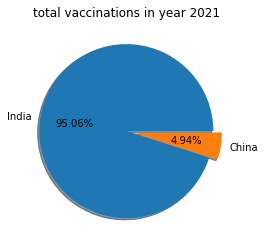

In [169]:
plt.pie(x,labels =y,explode =[0,0.1],shadow = True,autopct ='%1.2f%%')
plt.title('total vaccinations in year 2021')
plt.show()

### visualising using bar graph

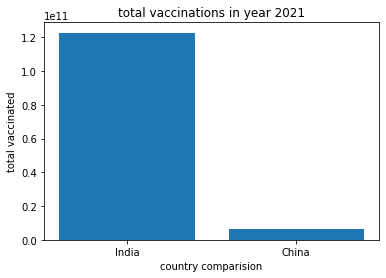

In [170]:
plt.bar(y,x)
plt.title('total vaccinations in year 2021')
plt.xlabel('country comparision')
plt.ylabel('total vaccinated')
plt.show()

### visualising using scatter plot

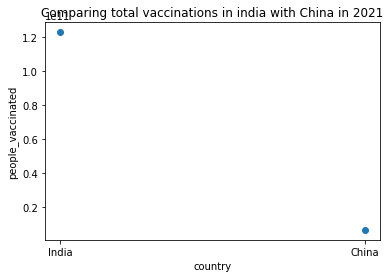

In [171]:
plt.scatter(y,x)
plt.title('Comparing total vaccinations in india with China in 2021')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

### visualising using line chart

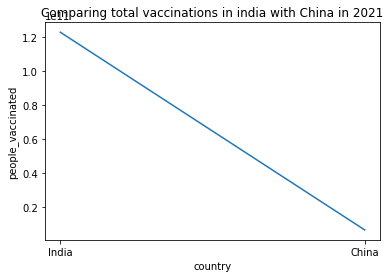

In [172]:
plt.plot(y,x)
plt.title('Comparing total vaccinations in india with China in 2021')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

# Q4.) Find the number of Vaccinations in each month in India in the year 2021

In [173]:
months = []
for i in df.values:
    months.append(i[5])
    
months = list(set(months))

data = []

for month in months:
    c = 0
    for i in df.values:
        if (i[6] == 2021) and (i[0] == 'India') and month == i[5]:
            c += (i[3])
    data.append([month,c])
    
df_ = pd.DataFrame(data,columns =['month','people_vaccinated']) 


### Pie distribution

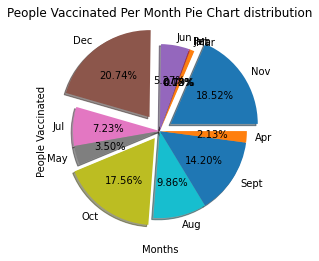

In [174]:
month = []
people_vaccinated = []
for i in data:
    month.append(i[0])
    people_vaccinated.append(i[1])
    
explodes =[0.15,0,0,0,0,0.2,0,0,0.1,0,0,0]
plt.pie(people_vaccinated , labels = month, explode =explodes , shadow = True,autopct = '%1.2f%%')
plt.title('People Vaccinated Per Month Pie Chart distribution')
plt.xlabel('Months')
plt.ylabel('People Vaccinated')

plt.show()

### bar Graph

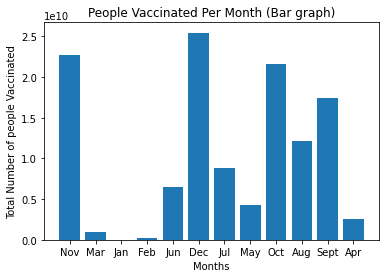

In [175]:
plt.bar(month,people_vaccinated)
plt.title('People Vaccinated Per Month (Bar graph)')
plt.xlabel('Months')
plt.ylabel('Total Number of people Vaccinated')
plt.show()

### line graph

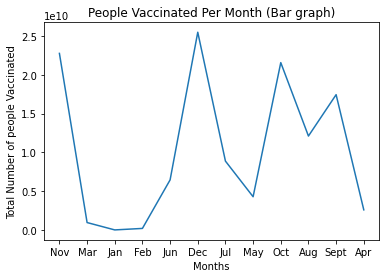

In [176]:
plt.plot(month,people_vaccinated)
plt.title('People Vaccinated Per Month (Bar graph)')
plt.xlabel('Months')
plt.ylabel('Total Number of people Vaccinated')
plt.show()

# Q5.) Which month has the most number of total vaccinations in India in 2021?

In [177]:
df_[df_['people_vaccinated']==max(df_['people_vaccinated'])]

,month,people_vaccinated
5,Dec,25463519203


### visualising using pie chart 

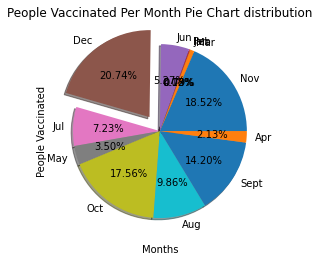

In [178]:
month = []
people_vaccinated = []
for i in data:
    month.append(i[0])
    people_vaccinated.append(i[1])
    
explodes =[0,0,0,0,0,0.2,0,0,0,0,0,0]
plt.pie(people_vaccinated , labels = month, explode =explodes , shadow = True,autopct = '%1.2f%%')
plt.title('People Vaccinated Per Month Pie Chart distribution')
plt.xlabel('Months')
plt.ylabel('People Vaccinated')

plt.show()

### visualising using bar

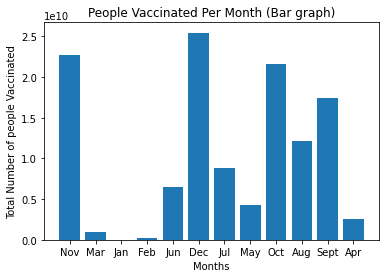

In [179]:
plt.bar(month,people_vaccinated)
plt.title('People Vaccinated Per Month (Bar graph)')
plt.xlabel('Months')
plt.ylabel('Total Number of people Vaccinated')
plt.show()

### visualising using scatterplot

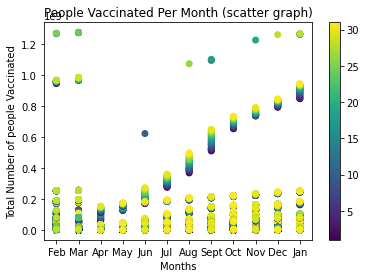

In [180]:
plt.scatter(df['month'],df['people_vaccinated'],c=df['day'])
plt.title('People Vaccinated Per Month (scatter graph)')
plt.xlabel('Months')
plt.ylabel('Total Number of people Vaccinated')
plt.colorbar()
plt.show()

### visualising using line graph

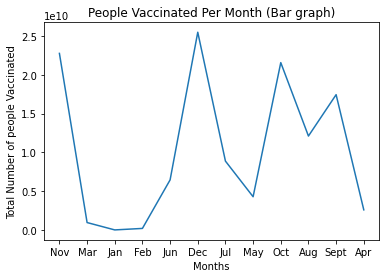

In [181]:
plt.plot(month,people_vaccinated)
plt.title('People Vaccinated Per Month (Bar graph)')
plt.xlabel('Months')
plt.ylabel('Total Number of people Vaccinated')
plt.show()